In [1]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Computation cat states

In [2]:
def _get_moon_cat_state(N: int, alpha_2: float, lam: complex):
    a = dq.destroy(N)
    dissip = a @ a - alpha_2 * dq.eye(N) + lam * dq.dag(a) @ a
    H = dq.dag(dissip) @ dissip
    _, P = jnp.linalg.eigh(H)
    index = jnp.where(dq.expect(dq.parity(N), P[:, 0].reshape((N, 1))) > 0, 0, 1)
    return P[:, index].reshape((N, 1))

In [12]:
moon_cat = _get_moon_cat_state(100, 4.0, 1)
a = dq.destroy(50)
dq.plot.wigner(a@moon_cat)

TypeError: dot_general requires contracting dimensions to have the same shape, got (50,) and (100,).

In [191]:
alpha = jnp.sqrt(10.0)
lambdas = jnp.linspace(0.0, 2.5, 101)
# moon_cats = jax.vmap(_get_moon_cat_state, in_axes=(None, 0, 0))(
#     100, alpha**2 * jnp.sqrt(1 + lambdas), lambdas
# )
moon_cats = jax.vmap(_get_moon_cat_state, in_axes=(None, None, 0))(
    100, alpha**2, lambdas
)
# moon_cats = jax.vmap(_get_moon_cat_state, in_axes=(None, 0, None))(
#     100, jnp.linspace(2, 4, 51), 0
# )

In [192]:
yvals = jnp.linspace(-1, 1, 201) * 2.0
_, _, wigners = dq.wigner(moon_cats, xvec=[0], yvec=yvals)
wigners = wigners[:, :, 0]

In [193]:
th_wigners = (
    2
    / jnp.pi
    * jnp.cos(4 * alpha / jnp.sqrt(1 + lambdas[:, None]) * yvals[None, :])
    * jnp.exp(-2 * yvals**2 / (1 + lambdas[:, None]))
)

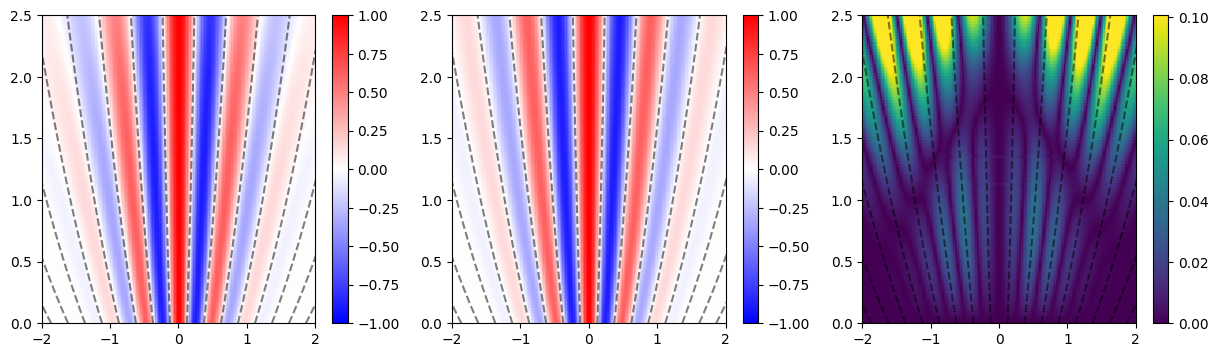

In [194]:
size = 4
fig, ax = plt.subplots(1, 3, figsize=(3 * (size + 1), size))
for _i, (a, d) in enumerate(
    zip(ax, [wigners, th_wigners, jnp.abs(wigners - th_wigners)])
):
    if _i < 2:
        kwargs = {"vmin": -1.0, "vmax": 1.0, "cmap": "bwr"}
    else:
        kwargs = {"vmin": 0, "vmax": jnp.abs(d).max(), "cmap": "viridis"}
    im = a.imshow(
        d * jnp.pi / 2,
        origin="lower",
        extent=[yvals[0], yvals[-1], lambdas[0], lambdas[-1]],
        aspect="auto",
        interpolation="none",
        **kwargs,
    )
    fig.colorbar(im, ax=a)
    a.set_xlim(*a.get_xlim())
    for n in range(10):
        xs = jnp.pi * (n + 0.5) / 4 / alpha * jnp.sqrt(1 + lambdas)
        for s in [-1, 1]:
            a.plot(s * xs, lambdas, c="k", ls="--", alpha=0.5)

# Exploration

In [13]:
import dynamiqs as dq

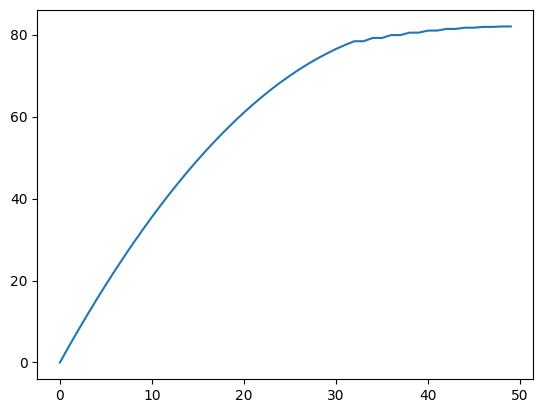

In [43]:
a = dq.destroy(50)
K = 0.05
delta = 4

H = delta*dq.dag(a)@a -K*dq.dag(a)@dq.dag(a)@a@a

D, P = jnp.linalg.eigh(H)
plt.plot(D)

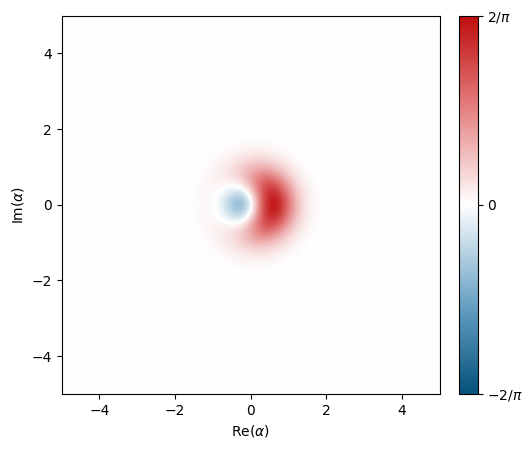

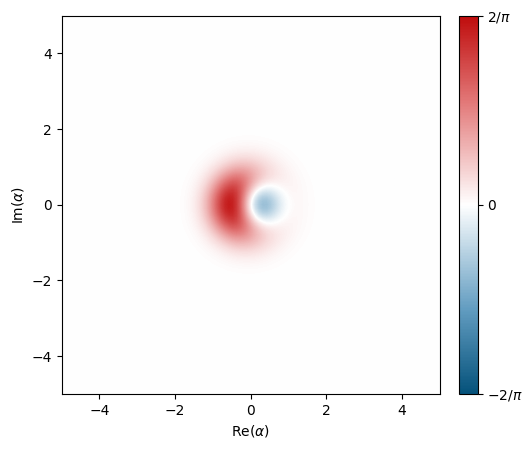

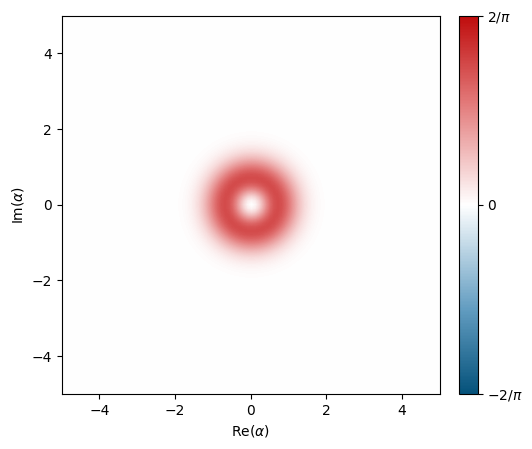

In [67]:
states = P.reshape((50, 50, 1))
plus, minus = dq.unit(states[:, 0] + states[:, 1]), dq.unit(states[:, 0] - states[:, 1])
P_code = plus@dq.dag(plus) + minus@dq.dag(minus)
dq.plot.wigner(plus)
dq.plot.wigner(minus)
dq.plot.wigner(P_code)

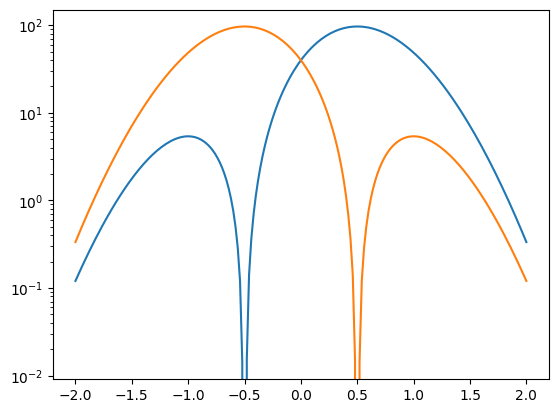

In [64]:
_, _, w = dq.wigner(states[:, 0] + states[:, 1], xvec=jnp.linspace(-2, 2, 201), yvec=jnp.linspace(-2, 2, 201))
plt.plot(jnp.linspace(-2, 2, 201), jnp.sum(w, axis=0))
_, _, w = dq.wigner(states[:, 0] - states[:, 1], xvec=jnp.linspace(-2, 2, 201), yvec=jnp.linspace(-2, 2, 201))
plt.plot(jnp.linspace(-2, 2, 201), jnp.sum(w, axis=0))
# plt.axhline(0, c="k", ls="--")
plt.yscale('log')

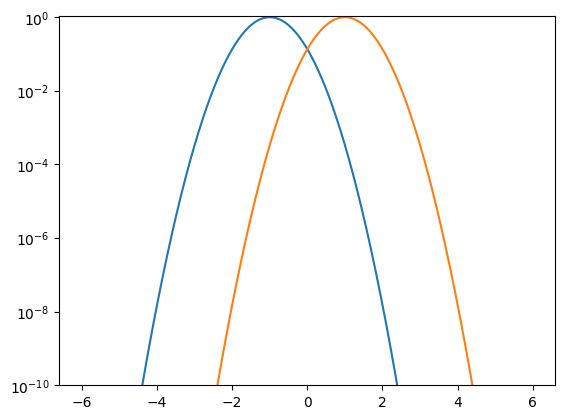

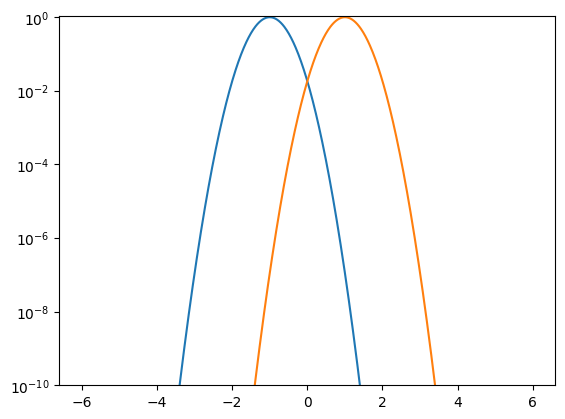

In [65]:
xs = jnp.linspace(-6, 6, 1001)
alpha = 1.
plt.plot(xs, jnp.exp(-(-alpha-xs)**2*2))
plt.plot(xs, jnp.exp(-(-alpha+xs)**2*2))
plt.yscale('log')
plt.ylim(1e-10, 1.1)
plt.show()

plt.plot(xs, jnp.exp(-(-alpha-xs)**2*4))
plt.plot(xs, jnp.exp(-(-alpha+xs)**2*4))
plt.yscale('log')
plt.ylim(1e-10, 1.1)
plt.show()